# Importing Packages

In [1]:
#Importing the necessary libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Importing Dataset

In [2]:
#Importing the raw data file
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
data.isna().values.any()#To find out NaN values

False

In [4]:
data.isnull().values.any() #To find out Null Values.

False

In [5]:
enc=LabelEncoder()
data.Age=enc.fit_transform(data.Age)
data.Attrition=enc.fit_transform(data.Attrition)
data.OverTime=enc.fit_transform(data.OverTime)
data.BusinessTravelFrequency=enc.fit_transform(data.BusinessTravelFrequency)
data.EmpJobRole=enc.fit_transform(data.EmpJobRole)
data.EmpDepartment=enc.fit_transform(data.EmpDepartment)
data.MaritalStatus =enc.fit_transform(data.MaritalStatus )
data.EducationBackground=enc.fit_transform(data.EducationBackground)
data.Gender =enc.fit_transform(data.Gender )
data.EmpNumber = enc.fit_transform(data.EmpNumber)

In [6]:
#Finding out the Correlation to find out which factors are significant
data.corr()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,1.000000,-0.053137,0.025922,0.023819,-0.038128,-0.234279,-0.044182,0.050270,-0.023405,0.005844,...,0.033013,-0.008414,0.020264,0.006075,-0.005061,0.002596,0.004240,0.010905,-0.020210,-0.003163
Age,-0.053137,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,0.025922,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,0.023819,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.038128,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.234279,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.044182,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.050270,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,-0.023405,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.005844,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529


<AxesSubplot:>

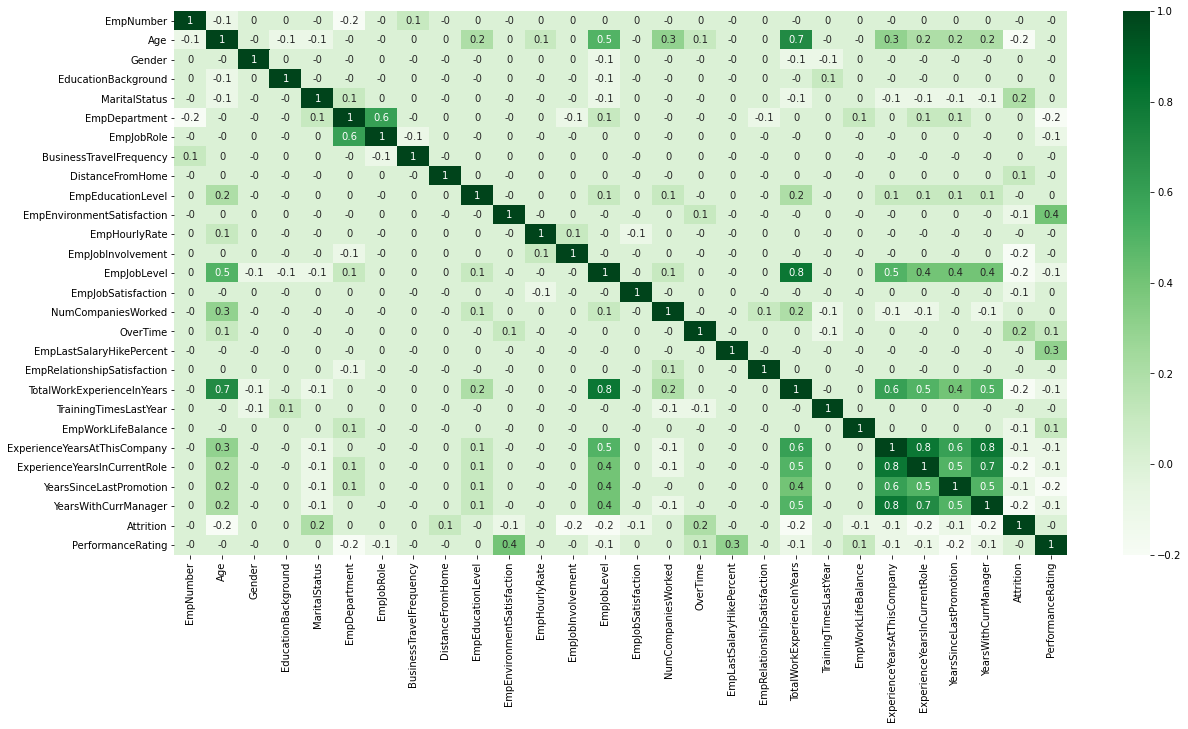

In [32]:
#Representing the Correlation Data by using Plotting.
plt.figure(figsize=(20,10))
sns.heatmap(round(data.corr(),1),annot=True,cmap='Greens')

# Feature Selection


Top 3 factors which affect the employee performance are:
1. EmpEnivornmentSatisfaction
2. EmpLastSalaryHikePercent
3. YearsSinceLastPromotion

# Models

In the selection below, we used algorithms like Logistic Regression, Ramdom Forest, Artifical Neural Network to calculate the accuracy and found out that Random Forest gives the maximum accuracy of 84% and Logistic Regression gives the accuracy of 80.6%.

In [8]:
x=data.loc[:,['EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent','YearsSinceLastPromotion']]
y=data.loc[:,['PerformanceRating']]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

# 1. Logistic Regression

In [10]:
#Training the Model
from sklearn.linear_model import LogisticRegression
model_logr=LogisticRegression()
model_logr.fit(x_train,y_train)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [11]:
#Prediciting the Model
y_predict_log=model_logr.predict(x_test)
y_predict_log

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 4, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3,
       3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3], d

In [12]:
#finding accaccuracy_score
accuracy_score(y_test,y_predict_log)*100

80.66666666666666

In [13]:
confusion_matrix(y_test,y_predict_log)

array([[ 14,  35,   5],
       [  4, 209,   6],
       [  1,   7,  19]], dtype=int64)

Accuracy by using Logistic Regression is 80.6%

# 2. Random Forest

In [14]:
#Training the Model
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

<ipython-input-14-2656244d4472>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train,y_train)


RandomForestClassifier()

In [15]:
#Predicting the Model
y_predict_rf=model_rf.predict(x_test)

In [16]:
#finding accaccuracy_score
accuracy_score(y_test,y_predict_rf)*100

84.0

In [17]:
confusion_matrix(y_test,y_predict_rf)

array([[ 40,  13,   1],
       [ 19, 193,   7],
       [  3,   5,  19]], dtype=int64)

Accuracy by using Random Forest is 84%

# 3. Artificial Neural Network

In [27]:
#Training the model
from sklearn.neural_network import MLPClassifier
model_mlp=MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=1,activation='relu',learning_rate_init=0.01)
model_mlp.fit(x_train,y_train)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(batch_size=1, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01)

In [30]:
#Predicting the model
y_predict_mlp=model_mlp.predict(x_test)

In [31]:
#finding accuracy_score and confusconfusion_matrix
accuracy_score(y_test,y_predict_mlp)*100

73.0

In [21]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 51,   2,   1],
       [ 24, 192,   3],
       [  3,  14,  10]], dtype=int64)

Accuracy by using Artificial Neural Network is 73%